In [1]:
# 베이스 - 디지털 신호 처리
# CNN - FIR 필터(음성 분석)
# RNN, LTSM - IIR 필터(음성 분석)
# 피드백(IIR)을 준다는 개념은
# 특정값을 찾아 수렴시키는 것이라 보면 된다.
# 마이크로 펀딩 => FPGA

In [2]:
# y(u, x) => ∂y / ∂u 혹은 ∂y / ∂x
# y' = ∂y / ∂x * ∂x / ∂u

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!ls Applied-Deep-Learning-with-Keras/Lesson09

AAPL_test.csv	  Activity18.ipynb  Exercise28.ipynb
AAPL_train.csv	  Activity19.ipynb  MSFT_test.csv
Activity17.ipynb  Exercise27.ipynb  MSFT_train.csv


In [32]:
trainSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras' +
    '/Lesson09/AAPL_train.csv'
)
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [33]:
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [20]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60:i, 0])
    y_train.append(trainSetScaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train = np.reshape(
    X_train, 
    (X_train.shape[0], X_train.shape[1], 1)
)
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [23]:
model = Sequential()

model.add(
    LSTM(
        50, return_sequences = True, 
        input_shape = (X_train.shape[1], 1)
    )
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(LSTM(50))
model.add(Dense(1))

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0238
Epoch 2/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0025
Epoch 3/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0025
Epoch 5/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0021
Epoch 6/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0012
Epoch 10/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0014
Epoch 11/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 12/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 13/100
38/38 [=====

In [25]:
testSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras' +
    '/Lesson09/AAPL_test.csv'
)
testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [26]:
actualStock = testSet.iloc[:, 1:2].values
actualStock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [35]:
testSet['Open']

0     154.889999
1     143.979996
2     144.529999
3     148.699997
4     149.559998
5     151.289993
6     152.500000
7     152.880005
8     150.850006
9     150.270004
10    153.080002
11    154.199997
12    157.500000
13    156.410004
14    154.149994
15    154.110001
16    155.479996
17    155.789993
18    156.250000
19    163.250000
20    166.110001
Name: Open, dtype: float64

In [36]:
trainSet['Open']

0        79.382858
1        78.980003
2        76.778572
3        77.760002
4        76.972855
           ...    
1253    148.149994
1254    148.300003
1255    155.839996
1256    157.500000
1257    158.529999
Name: Open, Length: 1258, dtype: float64

In [37]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis = 0
)

In [38]:
inputs = total[len(total) - len(testSet) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 81):
    X_test.append(inputs[i - 60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(
    X_test, 
    (X_test.shape[0], X_test.shape[1], 1)
)

predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

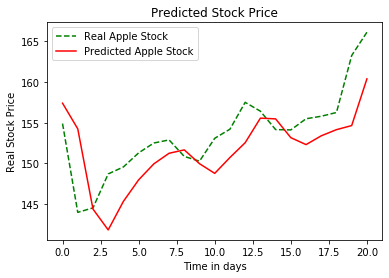

In [39]:
plt.plot(
    actualStock, color = 'green', 
    label = 'Real Apple Stock', ls='--'
)
plt.plot(
    predictedStock, color = 'red', 
    label = 'Predicted Apple Stock', ls='-'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()
# IIR 필터의 특성이 나타나고 있음
# 위상이 뒤틀린다.

In [ ]:
# 1. 새로운 터미널을 킨다.
# 2. pip uninstall -y keras
# 3. pip uninstall -y tensorflow
# 4. pip uninstall -y tensorflow-gpu
# 5. rm -rf ~/.keras
# 6. 새로 킨 터미널을 껏다가 다시 킨다.
# 7. pip install tensorflow==1.14
# 8. pip install keras==2.2.5
# 9. 터미널을 다시 껏다가 킨다.
# 10. jupyter notebook을 구동시킨다.

In [1]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image

import numpy as np

Using TensorFlow backend.
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflo

In [2]:
def prepare_img(img, target):
    img = img.resize(target)
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = imagenet_utils.preprocess_input(img)
    
    return img

In [3]:
resModel = None

def load_model():
    global resModel
    resModel = ResNet50()

In [4]:
import keras.backend.tensorflow_backend as tb
import tensorflow as tf

global graph, model
graph = tf.get_default_graph()

print(tf.__version__)

1.14.0
